###  Neural Network

A basic neural network consists of an input layer, which is data, in numerical form. After input layer, there are some "hidden" layers. A hidden layer is between input and output layers. One hidden layer means you have a neural network. Two or more hidden means you've got a deep neural network.

With a single hidden layer, the model is going to only learn linear relationships.

With many hidden layers, we can begin to learn non-linear relationships between input and output layers.

### Architecture

A single neuron is sum of all of the inputs x weights, fed through some sort of activation function. The activation function is meant to simulate a neuron firing or not. A simple example would be a stepper function, where, at some point, the threshold is crossed, and the neuron fires a 1, else a 0. 

Let's say that neuron is in the first hidden layer, and it's going to communicate with the next hidden layer. So it's going to send it's 0 or a 1 signal, multiplied by the weights, to the next neuron, and this is the process for all neurons and all layers.

### Mathematics Behind and tensorflow

The mathematical challenge for the artificial neural network is to best optimize thousands or millions or whatever number of weights you have, so that output layer results in what we were hoping for.
TensorFlow is used for all things "operations on tensors." A tensor is a multi-dimensional array.

### Keras

Keras is a higher-level API-like library, which sit on top of the deep learning libraries, like TensorFlow, which make building, testing, and tweaking models even more simple. It is now a superset, included with TensorFlow releases.

In [1]:
pip install --upgrade tensorflow

  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Using cached absl_py-0.12.0-py3-none-any.whl (129 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached protobuf-3.17.0-py2.py3-none-any.whl (173 kB)
  Using cached wheel-0.36.2-py2.py3-none-any.whl (35 kB)
Note: you may need to restart the kernel to use updated packages.  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)

  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached wrapt-1.12.1.tar.gz (27 kB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)
  Using cached google_auth_oau

In [2]:
import tensorflow.keras as keras

In [3]:
import tensorflow as tf # deep learning library. Tensors are just multi-dimensional arrays

print(tf.__version__)

2.5.0


In [17]:
mnist = tf.keras.datasets.mnist
# dataset of hand-written digits, 0 through 9. It's 28x28 images of these hand-written digits
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test
# x_train is the features, i.e., pixel values of the 28x28 images of these digits 0-9
# y_train is the label (is it a 0,1,2,3,4,5,6,7,8 or a 9)

In [18]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

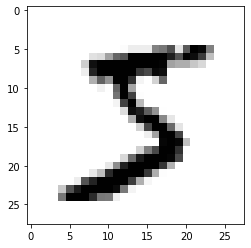

In [19]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [20]:
print(y_train[0])

5


It's generally good to normalize data. This typically involves scaling the data to be between 0 and 1, or maybe -1 and positive 1. In our case, each "pixel" is a feature, and each feature currently ranges from 0 to 255. Not quite 0 to 1. 

In [21]:
x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

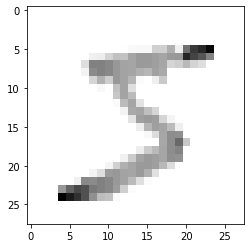

In [22]:
print(x_train[0])

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [23]:
model = tf.keras.models.Sequential()  # a basic feed-forward model

# A sequential model means things are going to go in direct order. A feed forward model. 

The input layer was flat. So, we need to take this 28x28 image, and make it a flat 1x784. Keras has a Flatten layer built

In [24]:
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784

# This will serve as input layer. It's going to take the data we throw at it, and just flatten it.

In [25]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation

# Fpr hidden layers, we're going to go with the simplest neural network layer, which is just a Dense layer. 
# It's a densely-connected layer, meaning it's "fully connected," where each node connects to each prior and subsequent node.

# This layer has 128 units. The activation function is relu(rectified linear).

In [26]:
# Add another identical layer for good measure.
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation

In [27]:
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  
# our output layer. 10 units for 10 classes. Softmax for probability distribution

# This is final layer. It has 10 nodes. 1 node per possible number prediction. 
# The activation function is a softmax function, it is more like a probability distribution of which of the possible prediction
# options this thing we're passing features through of is.

In [28]:
# compile the model

model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

# Adam optimizer. It's just a great default to start with.
# Loss is a calculation of error. 
# A neural network doesn't actually attempt to maximize accuracy. It attempts to minimize loss. 
# Some form of categorical crossentropy is a good start for a classification task like this.

In [29]:
model.fit(x_train, y_train, epochs=3)  # train the model

Epoch 1/3
1875/1875 [==============================] - 4s 1ms/step - loss: 0.2594 - accuracy: 0.9232
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1040 - accuracy: 0.9677
Epoch 3/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0704 - accuracy: 0.9780


Getting a high accuracy and low loss might mean your model learned how to classify digits in general (it generalized)
OR
it simply memorized every single example you showed it (it overfit). 
This is why we need to test on out-of-sample data.

In [30]:
val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

313/313 [==============================] - 1s 1ms/step - loss: 0.1102 - accuracy: 0.9653
0.11023920774459839
0.9653000235557556


In [31]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [32]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [33]:
predictions = new_model.predict(x_test)
print(predictions)

[[2.6957467e-08 1.1492467e-06 1.6571366e-05 ... 9.9998009e-01
  8.6741672e-09 8.2910617e-08]
 [2.3775304e-08 9.4760733e-04 9.9903190e-01 ... 1.7659156e-10
  2.8434874e-07 9.5629338e-12]
 [6.1142458e-07 9.9955171e-01 1.3018360e-04 ... 1.4333312e-04
  1.1868271e-04 2.3992839e-06]
 ...
 [6.2796581e-09 2.6398895e-06 1.5017644e-06 ... 1.1702537e-04
  1.1834905e-04 6.4236071e-04]
 [4.0921814e-06 8.9317126e-08 4.2353731e-06 ... 8.5631370e-07
  3.6469060e-03 7.0475970e-08]
 [1.1768245e-05 2.6077101e-08 1.1914588e-05 ... 9.8091840e-11
  2.1847245e-06 5.2897766e-09]]


In [34]:
import numpy as np

print(np.argmax(predictions[0]))

7


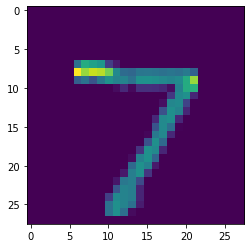

In [36]:
plt.imshow(x_test[0]) 
#cmap=plt.cm.binary
plt.show()